# **Predicting obesity levels based on eating habits and physical condition**



# **Problem statement** 

According to [WHO](https://www.who.int/health-topics/obesity#tab=tab_1
) verweight and obesity are defined as abnormal or excessive fat accumulation that presents a risk to health. A body mass index (BMI) over 25 is considered overweight, and over 30 is obese.  According to NHS.UK, being obese can increase the risk of developing many potentially serious health conditions, including: type 2 diabetes, high blood pressure, high cholesterol and atherosclerosis (where fatty deposits narrow your arteries), which can lead to coronary heart disease and stroke. As a result, the collaborative efforts to understand overweight and obesity as well as to promote healthy weight is an area to be reasearched on.

This project aims at predicting the obesity level of individuals on a value of 1–7. The [dataset](https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+
) is found from UCI, and includes data for the estimation of obesity levels in individuals based on their eating habits and physical condition in individuals from Colombia, Peru and Mexico. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data according to their classes/labels. The labels are given as Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III.

This project aims to predict the obesity level of  given a set of features as inputs. This prediction will  be solved as a classification problem using different classifier algorithms.

The source data can be found: [here](https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+)

In [ ]:
# import libraries and read data
import warnings

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
  
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score
from IPython.display import display

# from sklearn.metrics import accuracy_score


In [ ]:
def get_features(correlation_threshold,correlations):
    abs_corrs = correlations.abs()
    high_correlations = abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
    return high_correlations

In [ ]:
# A function to plot a readable confusion matrix found on kaggle's website.
import itertools
def plot_confusion_matrix(cm, classes,normalize,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving obesity.csv to obesity (2).csv


In [ ]:
obesity=pd.read_csv('obesity.csv')

The dataset has 2111 rows and 17 attributes. The target value is NObeyesdad (will be renamed later on) .

In [ ]:
#  Get to know the data
obesity.shape
obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Let us start by giving some of the variables self explanatory names to make understanding and usability easier


In [ ]:
obesity.rename(columns={'Gender':'gender','Age':'age','Height':'height','Weight':'weight','family_history_with_overweight':'family_ow_hist',
                'FAVC': 'freq_high_cal_food','FCVC': 'freq_consume_veg','NCP': 'no_main_meals','CAEC': 'food_bn_meals','SMOKE':'smoke',
                'CH2O': 'daily_water','SCC': 'monitor_cal','FAF': 'freq_phy_activity','TUE': 'time_tech_device',
                'CALC': 'cons_alchol','MTRANS': 'transportation','NObeyesdad': 'obes_level'}, inplace=True)

In [ ]:
obesity.head()

,gender,age,height,weight,family_ow_hist,freq_high_cal_food,freq_consume_veg,no_main_meals,food_bn_meals,smoke,daily_water,monitor_cal,freq_phy_activity,time_tech_device,cons_alchol,transportation,obes_level
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II



## **Data Exploration**



As seen on the results (below), the dataset doesn't have any missing values and we are good to go.

In [ ]:
# Check if there are missing values
obesity.isnull().mean()

gender                0.0
age                   0.0
height                0.0
weight                0.0
family_ow_hist        0.0
freq_high_cal_food    0.0
freq_consume_veg      0.0
no_main_meals         0.0
food_bn_meals         0.0
smoke                 0.0
daily_water           0.0
monitor_cal           0.0
freq_phy_activity     0.0
time_tech_device      0.0
cons_alchol           0.0
transportation        0.0
obes_level            0.0
dtype: float64

What does the data look like? What types of data are in the dataset?

In [ ]:
obesity.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5 non-null      object 
 1   age                 5 non-null      float64
 2   height              5 non-null      float64
 3   weight              5 non-null      float64
 4   family_ow_hist      5 non-null      object 
 5   freq_high_cal_food  5 non-null      object 
 6   freq_consume_veg    5 non-null      float64
 7   no_main_meals       5 non-null      float64
 8   food_bn_meals       5 non-null      object 
 9   smoke               5 non-null      object 
 10  daily_water         5 non-null      float64
 11  monitor_cal         5 non-null      object 
 12  freq_phy_activity   5 non-null      float64
 13  time_tech_device    5 non-null      float64
 14  cons_alchol         5 non-null      object 
 15  transportation      5 non-null      object 
 16  obes_level  

What does the distribution of data look like  with respect to the target variable? This helps to decide what percentage is acceptable in order to say a model is good or not.

In [ ]:
obesity["obes_level"].value_counts(normalize=True).sort_index()

Insufficient_Weight    0.128849
Normal_Weight          0.135955
Obesity_Type_I         0.166272
Obesity_Type_II        0.140692
Obesity_Type_III       0.153482
Overweight_Level_I     0.137376
Overweight_Level_II    0.137376
Name: obes_level, dtype: float64

As seen above and on the visualiation, there is a good proportion of data in each of the classes. Thus, problems related with imbalanced data won't be an issue on this dataset.

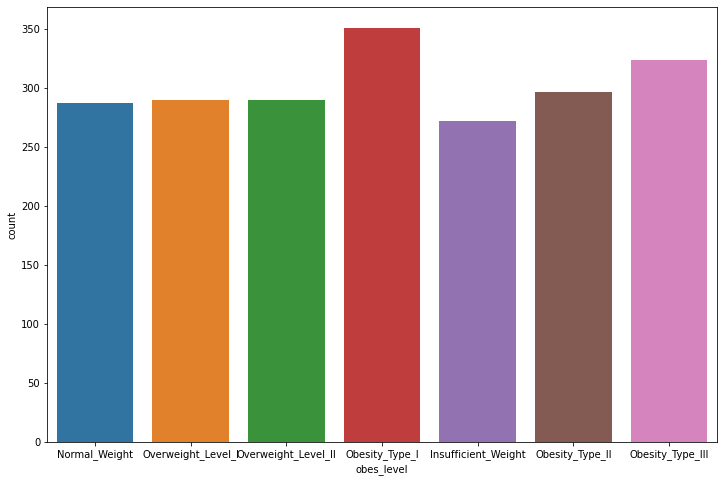

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x=obesity["obes_level"])
plt.show()

 Encode catagorical values before we can use them to fit & evaluate a model. Let us start by encoding the target variable, "obes_level",  code it by considering the ordinality of the values (1 and 7 imply underweight and Obesity level III, respectivelly).

In [ ]:
# Encode 'obes_level' in to numeric values
mapper = {'Insufficient_Weight': 1, 'Normal_Weight': 2, "Overweight_Level_I":3, "Overweight_Level_II":4,
           "Obesity_Type_I":5,"Obesity_Type_II":6,"Obesity_Type_III":7}
obesity=obesity.replace({"obes_level": mapper})
obesity['obes_level']=obesity['obes_level'].astype(int)

Let us identify numeric and non-numeric values and prepare them for encoding as most machine learning algorithms require input and output variables to be numbers.

In [ ]:
# Label data with respect to their data types
cat_cols=[col for col in obesity if (obesity[col].dtype=='O')]
# Ordinal categories
ord_cat=['food_bn_meals','cons_alchol']
# Numeric columns
num_cols=[col for col in obesity if col not in cat_cols]

for item in cat_cols:
  if item in ord_cat:
    cat_cols.remove(item)

drop_cats=['Female','no','no', 'no','no','Public_Transportation']


Plot boxplot for numeric variables in order to check the presence of outliers.From the results on the box plot, we don't have many outliers, but the variable Age seems to have some. which will be addressed later.

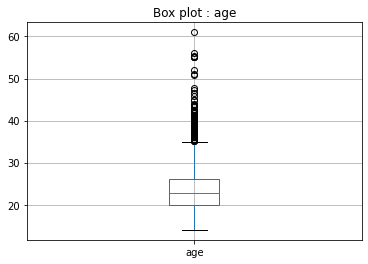

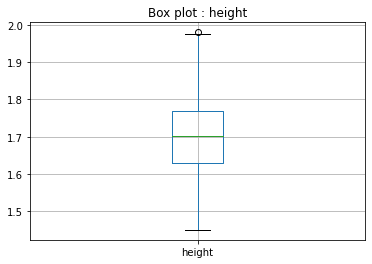

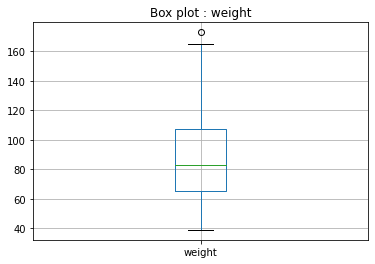

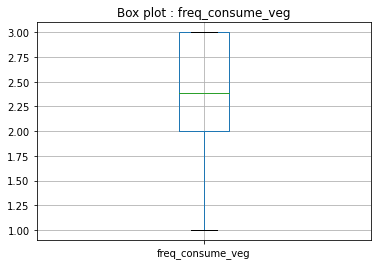

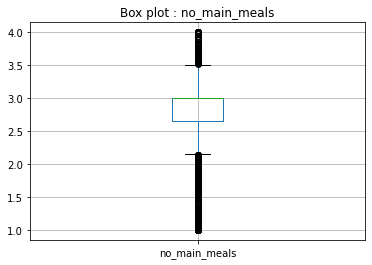

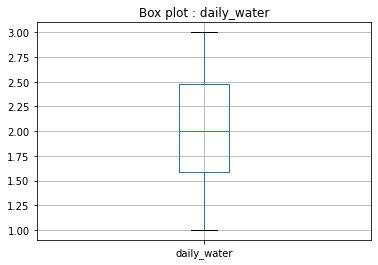

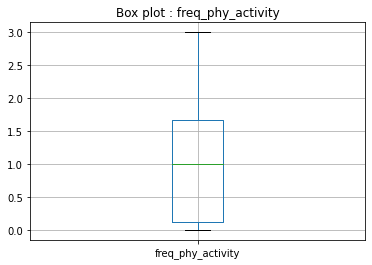

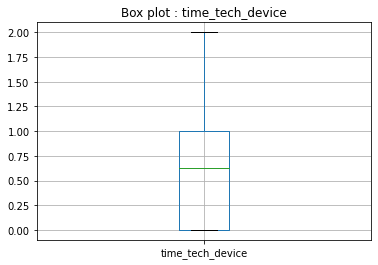

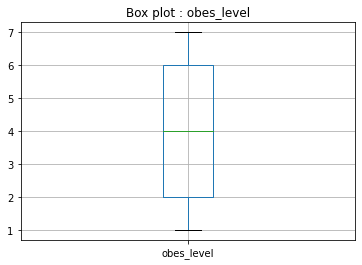

In [ ]:
# Draw boxplot inorder to see if there are outliers in the dataset
for col in obesity[num_cols]:
    plt.figure()
    plt.title('Box plot : {}'.format(col))
    obesity.boxplot([col])

Now, let us explore how categorical variables are interacting with or affecting the target variable. 

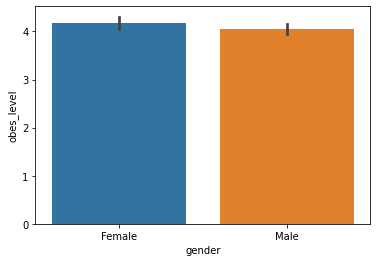

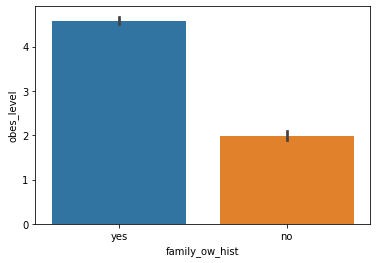

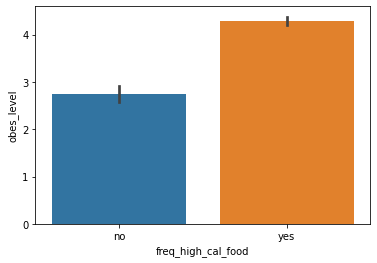

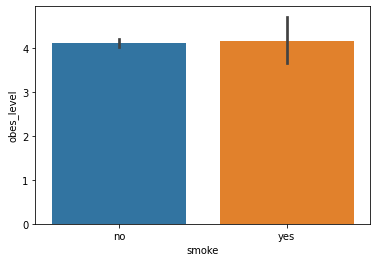

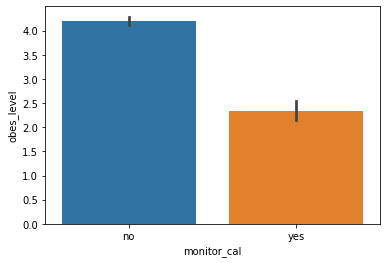

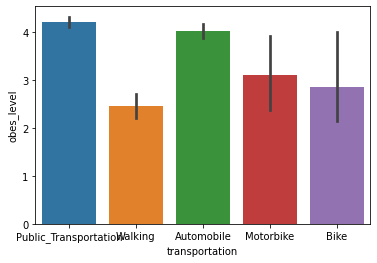

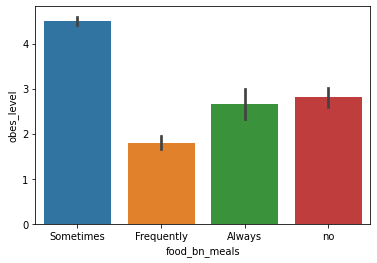

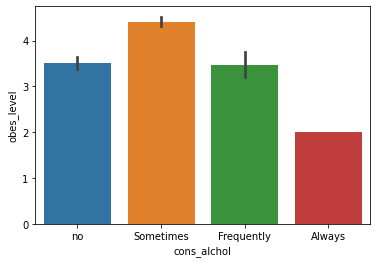

In [ ]:
for col in (cat_cols + ord_cat):
  sns.barplot(x=col, y='obes_level',data=obesity)
  plt.show()

Few observations from the above plots:
- There is no much difference in weight between gender and smoking.
- Individuals with family overweight history tend to be over-weight or obese.
- Individuals who frequently consume high calorie food tend to have higher obesity level.
- Those who eat food between meals sometimes tend to be over-weight or obese, whereas those who always consume food between meals tend to have lower weight(may be the type of food they eat?).
- People who monitor their calorie intakes regularly tends to have a normal weight.
- People who consume alcohol always have normal weight, where as those who don't consume at all have the highest obesity level, followed by the indivuduals who responded as sometimes (second most)
-People who walk have a normal weight followed by those who utilizes bike and  motor bike. People who use public and automobil transportaion tend to be obese.

Encoding ordinal features

In [ ]:
# Encode ordinal features
mapper = {'no': 1, 'Sometimes': 2, 'Frequently':3, 'Always':4}
for col in ord_cat:
  obesity=obesity.replace({col: mapper})
  obesity[col]=obesity[col].astype(int)

###Let us explore and visualize the numerical features in the dataset.

####This step, is to visually and statistically explore the correlation b/n features as well as between features and the target variable. However, we don't see that  much defined relationship among the features except weight and height, which some to have some linear relationship.


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


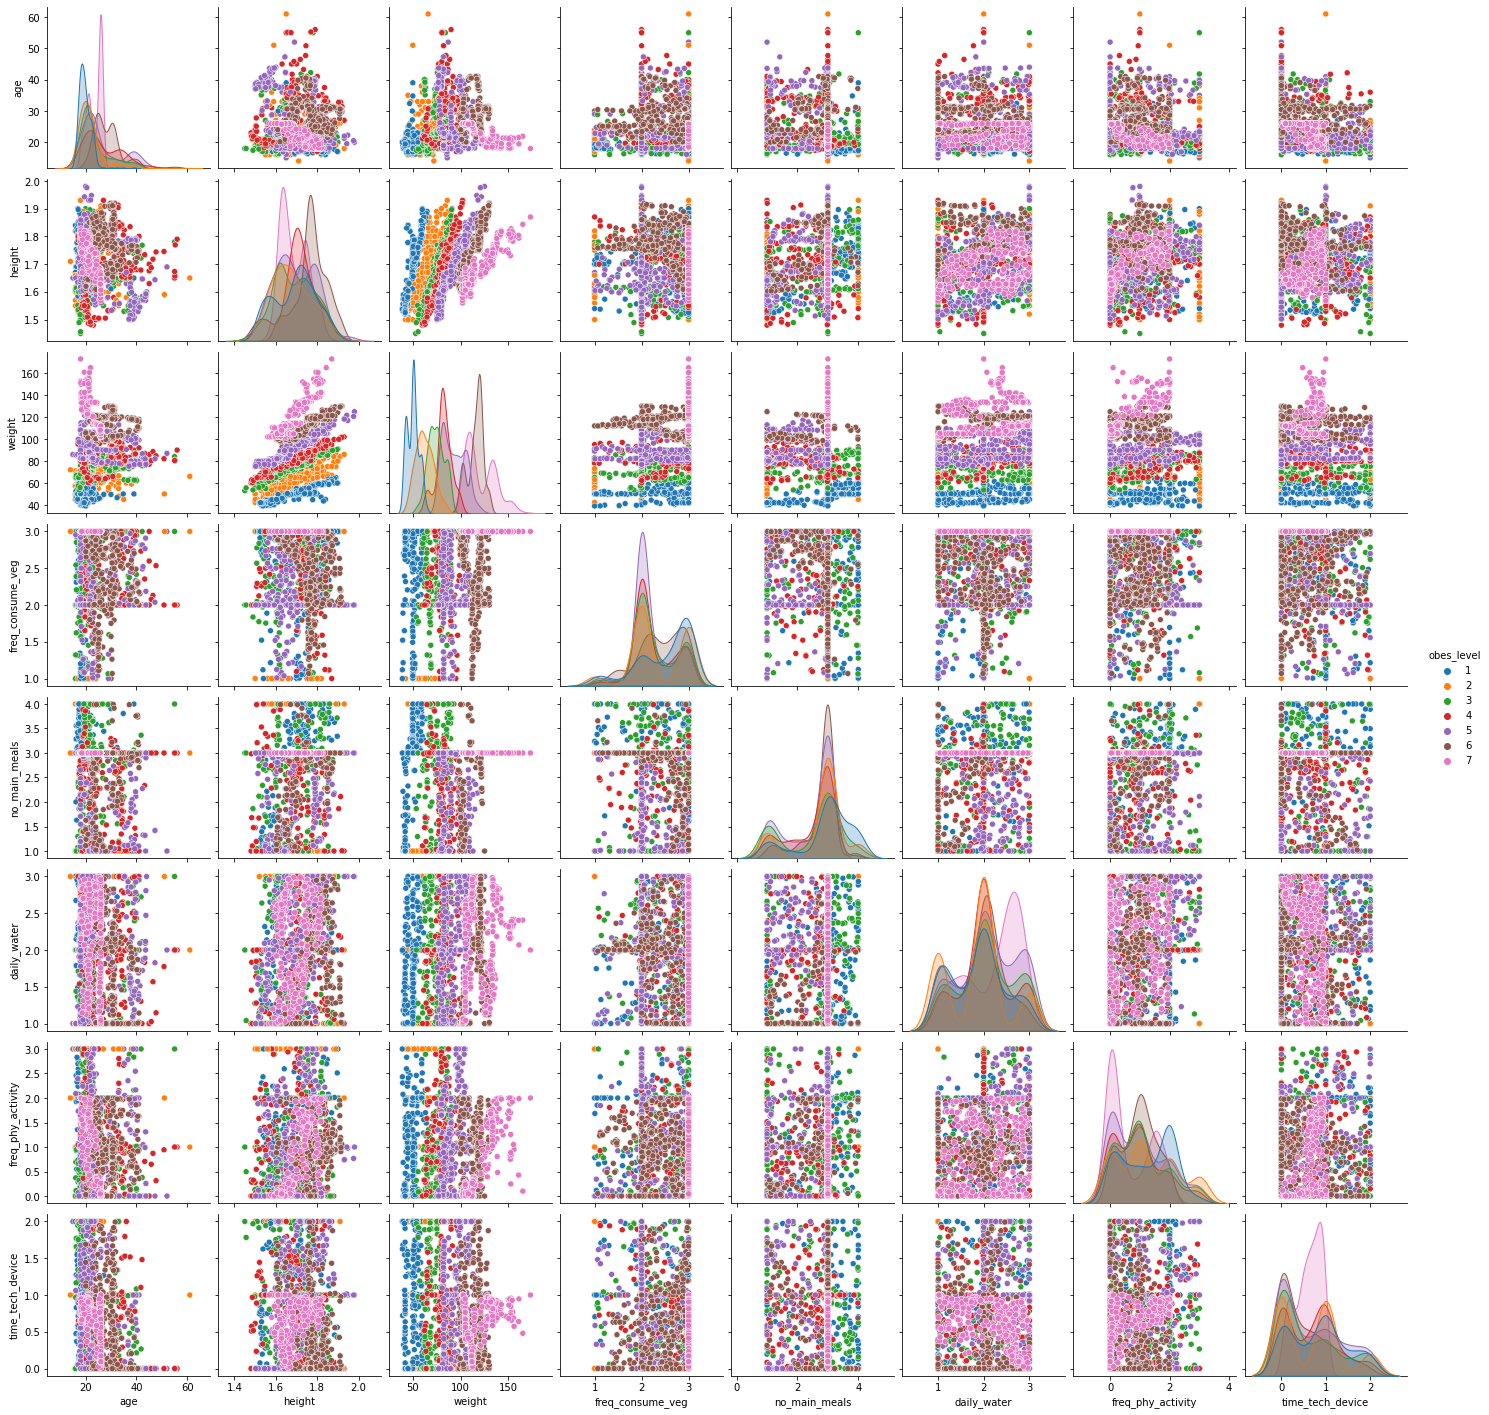

In [ ]:
sns.pairplot(obesity[num_cols], hue="obes_level",palette='tab10')
plt.show()

Finding the correlation of each feature with the target variable - obes_level. Some features like weight (expected), age, freq_consume_veg, height and daily_water consumption to have a weak correlation with the response variable. .
Looking at the correlation will also give some insights on which of the features are important in predicting the model. 

In [ ]:
corr_with_target = obesity.corr()['obes_level'].drop('obes_level').sort_values(ascending=False)
print(corr_with_target)

weight               0.913251
age                  0.282913
freq_consume_veg     0.227759
cons_alchol          0.151752
height               0.133565
daily_water          0.133008
no_main_meals        0.026690
time_tech_device    -0.107991
freq_phy_activity   -0.199901
food_bn_meals       -0.329350
Name: obes_level, dtype: float64


Now, let us see if the other features have multicolinearity, which is a correlation among the features themselves. We can also use this step as part of feature selection as it will give us the idea about which features are important.

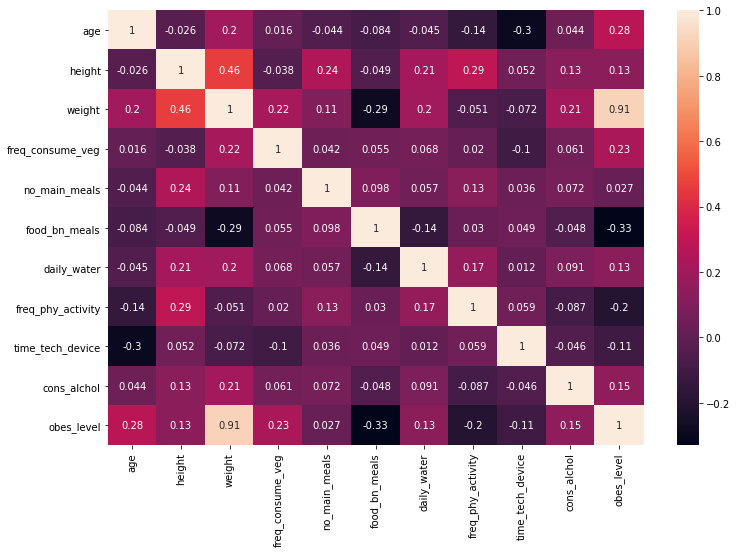

In [ ]:
#Visualizing the overall correlation to see how features are related (multicollenearity)
plt.figure(figsize=(12,8))
sns.heatmap(obesity.corr(),annot=True)
plt.show()

#**Model preparation**

Let us start by separating data into its X and y components, and perform a train_test_split. 20% of the data is used for testing and 80% for training.


In [ ]:
X=obesity.drop(columns=['obes_level'])
y=obesity['obes_level']
X_train, X_test,y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
num_cols.remove ('obes_level')

In the following steps, we will encode our categorical variables as well as scale the data to ensure that larger scale variable won't dominate prediction and each feature contributes approximately proportionately to the model.

In [ ]:
# Define a ColumnTransformer to one hot encoding & scaling
preprocessing=ColumnTransformer([
    ('one_hot_encode', OneHotEncoder(drop=drop_cats), cat_cols),
    ('scale', StandardScaler(), num_cols),],
  remainder='passthrough',)

In [ ]:
preprocessing.fit(X_train,y_train)
X_train=preprocessing.transform(X_train)
X_test=preprocessing.transform(X_test)

# **Modeling**

####In this step, we will train different classificaiton models in order to be able to choose the optimal model among well-performing ones. The response variable to be predicted is 'obes_level'.

###**Logistic Regression**
Let us start by using the LogisticRegression (multi-class) classifier and use 5-fold cross validation to train the model.

In [ ]:
from sklearn.model_selection import cross_val_score
# Using ovr as target variable is ordinal
lr_clf = LogisticRegression(solver='lbfgs',multi_class='ovr', random_state=53)
lr_clf.fit(X_train, y_train)

lr_train_score=lr_clf.score(X_train,y_train)
lr_test_score=lr_clf.score(X_test,y_test)

print(f"Train score: {lr_train_score}")
print(f"Test score: {lr_test_score}")

Train score: 0.7784360189573459
Test score: 0.7635933806146572


In [ ]:
# Cross validation with Logistic regression
lr_cv_scores = cross_val_score(lr_clf, X_train, y_train, cv=5)

print('Accuracy scores for the 5 folds: ', lr_cv_scores)
print('Mean cross validation score: {:.3f}'.format(np.mean(lr_cv_scores)))

Accuracy scores for the 5 folds:  [0.74556213 0.75443787 0.76331361 0.7537092  0.75074184]
Mean cross validation score: 0.754


Is it a good accuracy?
Can we do better by tuning hyperparametres?

*** From the results below, the training and testing score has slightly improved (from 77.8 to 79.6 and from 76.3 to 78.2 respectivelly) by tuning the solver and C values.

In [ ]:
lr_grid = {
    "C": [0.01, 0.1, 1, 10,1000],
    'solver':['newton-cg', 'lbfgs'],
    'penalty': ['l2']
}

grid_lr = GridSearchCV(LogisticRegression(multi_class='ovr'), lr_grid, cv=2, verbose=1, n_jobs=-1)
grid_lr.fit(X_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


In [ ]:
# Print results after Logistic Regression parameter tuning
print(f"Tuned param: {grid_lr.best_params_}")
print(f"Tuned train score: {grid_lr.score(X_train, y_train)}")
print(f"Tuned test score: {grid_lr.score(X_test, y_test)}")

In [ ]:
# Save prediction values to plot a confusion matrix latter
model_lr_pred=grid_lr.predict(X_test)
confusion_mat_lr = confusion_matrix(y_test, model_lr_pred)

By looking at the confusion matrix (above) & the classificaton report (below), we can tell that Logistic Regression seems to predict Individuals with Obesity level III (7), Obesity level II(6) and under weights(1) better than the other classes.

In [ ]:
pred_lr= lr_clf.predict(X_test)
cls_rep_lr = classification_report(y_test, pred_lr)
print(cls_rep_lr)

### **RandomForest**  
As we did in the logistic regression, we will train the model,
see the cross validation scores and the mean of the cross validation as well as generate prediction on the test data; but this time we will be using the  RandomForestClassifier. 

In [ ]:
# Print out the accuracy of the predictor on the training and test data.

rf_clf = RandomForestClassifier(n_estimators=24, random_state=64)
rf_clf.fit(X_train, y_train)

rf_train_score=lr_clf.score(X_train,y_train)
rf_test_score=lr_clf.score(X_test,y_test)

print(f"Train score: {rf_train_score}")
print(f"Test score: {rf_test_score}")

In [ ]:
rf_cv_scores = cross_val_score(rf_clf, X_train, y_train, cv=5)
rf_clf_predictions = rf_clf.predict(X_test)

print('Accuracy scores for the 5 folds: ', rf_cv_scores)
print('Mean cross validation score: {:.3f}'.format(np.mean(rf_cv_scores)))

Random forest seems to perform well when cross validation with 5 folds is used (.93 compared with .78). Can we do better? 

In [ ]:
rf_grid = {
    "n_estimators": [150,200,300],
    "max_depth": [4,5,6],
    "min_samples_leaf": [10,50,75]
}

grid_rf = GridSearchCV(RandomForestClassifier(), rf_grid, cv=2, verbose=1, n_jobs=-1)
grid_rf.fit(X_train, y_train)

In [ ]:
# Print results after Logistic Regression parameter tuning
print(f"Tuned param: {grid_rf.best_params_}")
print(f"Tuned train score: {grid_rf.score(X_train, y_train)}")
print(f"Tuned test score: {grid_rf.score(X_test, y_test)}")

We have got at tuned train vs test score of .93 and .87 using cross validation with 2 folds, which is slightly better than using cross validation with 5 folds (.93 and .86).

In [ ]:
# Save prediction values to plot a confusion matrix latter
model_rf_pred=grid_rf.predict(X_test)
confusion_mat_rf = confusion_matrix(y_test, model_rf_pred)

In [ ]:
pred_rf = rf_clf.predict(X_test)
cls_rep_rf = classification_report(y_test, pred_rf)
print(cls_rep_rf)

As seen on the confusion matrix and classication report, Random Forest performed well in predicting most of the classes except individual in normal and over-weight I classes.

#**Prediction using Support Vector Machine**


In [ ]:
svm_clf = svm.SVC()
svm_clf.fit(X_train, y_train)

svm_train_score=lr_clf.score(X_train,y_train)
svm_test_score=lr_clf.score(X_test,y_test)

print(f"Train score: {svm_train_score}")
print(f"Test score: {svm_test_score}")

In [ ]:
svm_cv_scores = cross_val_score(svm_clf, X_train, y_train, cv=5)
svm_clf_predictions = svm_clf.predict(X_test)

print('Accuracy scores for the 5 folds: ', svm_cv_scores)
print('Mean cross validation score: {:.3f}'.format(np.mean(svm_cv_scores)))

In [ ]:
from sklearn import svm
svm_grid = {
        'C': [0.1, 1, 10,100],  
        'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
        'kernel': ['rbf']
}

grid_svm = GridSearchCV(svm.SVC(), svm_grid, cv=5, verbose=1, n_jobs=-1)
grid_svm.fit(X_train, y_train)

In [ ]:
# Print results after Logistic Regression parameter tuning
print(f"Tuned param: {grid_svm.best_params_}")
print(f"Tuned train score: {grid_svm.score(X_train, y_train)}")
print(f"Tuned test score: {grid_svm.score(X_test, y_test)}")

In [ ]:
# Save prediction values to plot a confusion matrix latter
model_svm_pred=grid_svm.predict(X_test)
confusion_mat_svm = confusion_matrix(y_test, model_svm_pred)

In [ ]:
pred_svm = svm_clf.predict(X_test)
cls_rep_svm = classification_report(y_test, pred_svm)
print(cls_rep_svm)

##**Prediction using KNN**

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=10)
# Then fit the model
knn_clf.fit(X_train, y_train)

knn_train_score=knn_clf.score(X_train,y_train)
knn_test_score=knn_clf.score(X_test,y_test)

print(f"Train score: {knn_train_score}")
print(f"Test score: {knn_test_score}")


In [ ]:
knn_cv_scores = cross_val_score(knn_clf, X_train, y_train, cv=5)
knn_clf_predictions = knn_clf.predict(X_test)

print('Accuracy scores for the 5 folds: ', knn_cv_scores)
print('Mean cross validation score: {:.3f}'.format(np.mean(knn_cv_scores)))

In [ ]:
knn_grid = {"n_neighbors": [10,25, 50]}

grid_knn = GridSearchCV(KNeighborsClassifier(), knn_grid, cv=5, verbose=1, n_jobs=-1)
grid_knn.fit(X_train, y_train)

In [ ]:
# Print results after KNN parameter tuning, which is the k_neighbors
print(f"Tuned param: {grid_knn.best_params_}")
print(f"Tuned train score: {grid_knn.score(X_train, y_train)}")
print(f"Tuned test score: {grid_knn.score(X_test, y_test)}")

GridSearchCV() helps to find best fitting value of k. Incase of over/under fitting,some times it is food to loop manually to view where over/underfitting starts to occur. As depicted on the chart below, the optimal value to get a good score for both the training and the test data is around k=10. Thus, let us adjust the value of k and re-run the grid search.

In [ ]:
# Write a for loop to assess the accuracy of n_neighbors on train & test for values 1 through 50.
# Store the train & test accuracies from each iteration
ks = [1, 5, 10, 25, 50]
train_scores = []
test_scores = []

for k in ks:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    train_scores.append(train_score)
    test_scores.append(test_score)

plt.plot(ks, train_scores, label="Train")
plt.plot(ks, test_scores, label="Test")
plt.xlabel("k")  # label x axis
plt.ylabel("Accuracy")  # label y axis
plt.legend()  # Display a legend
plt.show()

In [ ]:
# Save prediction values to plot a confusion matrix latter
model_knn_pred=grid_knn.predict(X_test)
confusion_mat_knn = confusion_matrix(y_test, model_knn_pred)

In [ ]:
pred_knn = knn_clf.predict(X_test)
cls_rep_knn = classification_report(y_test, pred_knn)
print(cls_rep_knn)

# **Compare model predictions among Logistic Regression, Random Forest, SVM & KNN**

#### In this project four classification algorithms have been trained and validated. It is time to identify which classifier performed well. In order to assess the performance, we will use the confusion matrix. 

Accuracy can be a good metric to measure and compare the performance of the models a model **as we have balanced classes to some extent**. To follow the general rule, we will be using the F1-score: the higher an F-score, the more accurate a model is. In this regard, Random forest has the highest F1-score (93%) followed by SVM (.92). KNN (.83) and Logistic Regression(.76)scored 3rd and 4th respectively. 
However, F1-score is still more generic. Let us see the precison and recall, where high precision reltates to low false positives and high recall implies low false negatives. In this study, we prioritize recall over precision as the risk of classifying over-weight or obese person as normal is more riskier than vice versa.
 - If we compare the models based on recall metric, Random Forest has the highest recall overall rate (.93) as well as for over-weight and obese classes (.94,.96,.96 and .98).
 - Support Vector Machine performed second by having overall recall rate (.92) and higher over-weight and obese classes (.88,.95,.97, and 1.0).

 - All models including the less performing ones could classify underweight obes level III individuals correctly.
 - In order to see individual counts of correctly classified or misclassified classes, the rearranged matrix (below) can be used. Diagonal values are the correct predictions and off diagonals are errors.

In [ ]:
#  Print classification report for each model
class_rep={'Logistic Regression': cls_rep_lr,'Random Forest':cls_rep_rf,'Support Vector Machine': cls_rep_svm,'KNN':cls_rep_knn}
for model,cr in class_rep.items():
  print(model+'\n',cr+'\n')

###Let us rearange the matrix for easier interpretation using a function found on  [kaggle's website](https://www.baeldung.com/cs/svm-multiclass-classification).

Here, actual classes are rows and predicted classes are columns. Diagonal values are the correct predictions and off diagonals are errors.

In [ ]:
# Display the confusion matrix for all the models
index=["Under_Weight", "Normal_Weight", "Overweight_Level_I","Overweight_Level_II", 
       "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]
columns=["pred_UW", "pred_NW", "pred_OW_I","pred_OW_II", "pred_OT_I", "pred_OT_II","pred_OT_III"]

conf_mat={'Logistic Regression': confusion_mat_lr,'Random Forest':confusion_mat_rf,'Support Vector Machine': confusion_mat_svm,'KNN':confusion_mat_knn}

for model,cm in conf_mat.items():
  confusion_df = pd.DataFrame(cm,index=index,columns=columns)
  display(model,confusion_df)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

# **Conclusion**


- This project is a classification problem, where performance of four different classification algorithms have been analyzed.
- Dataset sourced from UCI Machine Learning Repository 
- Step by step Machine learning steps have been followed: EDA, Data preparation, Model selection & training, and Model evaluation.
  
- GridSearch had been used to perform hyperparameter optimization
- Confusion Matrix is used in order to test the model's performances
- Random Forest is found to be the best performing model for this dataset.
- This project can be further extended as a regression problem by incorporating more datasets and by considering ordinal response variable.
